# K-Means Clustering

In [79]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [80]:
# Suppress memory leak warnings.
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

In [81]:
# Define possible dataset paths.
paths = [
    '../datasets/_integrated_data/dropped-column-if-missing-value/data.csv',                            # 0  - Annual  : Dropped column if missing value
    '../datasets/_integrated_data/dropped-column-if-missing-value/data-gendered.csv',                   # 1  - Annual  : Dropped column if missing value         - Gendered
    '../datasets/_integrated_data/dropped-row-if-missing-value/data.csv',                               # 2  - Annual  : Dropped row if missing value
    '../datasets/_integrated_data/dropped-row-if-missing-value/data-gendered.csv',                      # 3  - Annual  : Dropped row if missing value            - Gendered
    '../datasets/_integrated_data/missing-pollutant-values-as-NA/data.csv',                             # 4  - Annual  : Missing pollutant values as NA
    '../datasets/_integrated_data/missing-pollutant-values-as-NA/data-gendered.csv',                    # 5  - Annual  : Missing pollutant values as NA          - Gendered
    '../datasets/_integrated_data/missing-pollutant-values-as-NaN/data.csv',                            # 6  - Annual  : Missing pollutant values as NaN
    '../datasets/_integrated_data/missing-pollutant-values-as-NaN/data-gendered.csv',                   # 7  - Annual  : Missing pollutant values as NaN         - Gendered
    '../datasets/_integrated_data/missing-pollutant-values-filled-somehow/data.csv',                    # 8  - Annual  : Missing pollutant values filled somehow
    '../datasets/_integrated_data/missing-pollutant-values-filled-somehow/data-gendered.csv',           # 9  - Annual  : Missing pollutant values filled somehow - Gendered
    '../datasets/_integrated_data/monthly/dropped-column-if-missing-value/data.csv',                    # 10 - Monthly : Dropped column if missing value
    '../datasets/_integrated_data/monthly/dropped-column-if-missing-value/data-gendered.csv',           # 11 - Monthly : Dropped column if missing value         - Gendered
    '../datasets/_integrated_data/monthly/dropped-row-if-missing-value/data.csv',                       # 12 - Monthly : Dropped row if missing value
    '../datasets/_integrated_data/monthly/dropped-row-if-missing-value/data-gendered.csv',              # 13 - Monthly : Dropped row if missing value            - Gendered
    '../datasets/_integrated_data/monthly/missing-pollutant-values-as-NA/data.csv',                     # 14 - Monthly : Missing pollutant values as NA
    '../datasets/_integrated_data/monthly/missing-pollutant-values-as-NA/data-gendered.csv',            # 15 - Monthly : Missing pollutant values as NA          - Gendered
    '../datasets/_integrated_data/monthly/missing-pollutant-values-as-NaN/data.csv',                    # 16 - Monthly : Missing pollutant values as NaN
    '../datasets/_integrated_data/monthly/missing-pollutant-values-as-NaN/data-gendered.csv',           # 17 - Monthly : Missing pollutant values as NaN         - Gendered
    '../datasets/_integrated_data/monthly/missing-pollutant-values-filled-somehow/data.csv',            # 18 - Monthly : Missing pollutant values filled somehow
    '../datasets/_integrated_data/monthly/missing-pollutant-values-filled-somehow/data-gendered.csv'    # 19 - Monthly : Missing pollutant values filled somehow - Gendered
]

# Choose a dataset.
chosen_dataset = 19

# Load the data
df = pd.read_csv(paths[chosen_dataset])

# Count of number of pollutant features in the dataset
column_list = ['CO ppm', 'NO pphm', 'NO2 pphm', 'OZONE pphm', 'PM10 µg/m³', 'SO2 pphm']
n_pollutants = sum([1 for col in df.columns if col in column_list])

# Extract pollutant columns and columns after the pollutants
pollutant_columns = [col for col in df.columns if col in column_list]
health_stat_columns = df.iloc[:, df.columns.get_loc(pollutant_columns[-1]) + 1:]

# Standardize the pollutant columns
scaler = StandardScaler()
scaled_pollutants = scaler.fit_transform(df[pollutant_columns])

# Show the dataset
print(f"Dataset shape: {df.shape}")
print(f"Number of pollutant features: {n_pollutants}")
df.describe()

Dataset shape: (1560, 10)
Number of pollutant features: 6


,CO ppm,NO pphm,NO2 pphm,OZONE pphm,PM10 µg/m³,SO2 pphm,asthma edp [f],asthma edp [m]
count,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000
mean,0.133039,0.547513,0.585202,1.854216,18.511935,0.068814,31.443974,28.617436
std,0.076290,0.732098,0.374287,0.431311,4.919421,0.047696,15.288249,13.584746
min,0.000000,0.000000,0.000000,0.623026,8.095566,0.000000,4.600000,2.800000
25%,0.100000,0.136131,0.302769,1.550000,15.605194,0.033193,19.757692,19.100000
50%,0.133039,0.275000,0.484458,1.850000,18.511935,0.068814,28.811538,26.600000
75%,0.193861,0.575000,0.755558,2.150000,19.680863,0.100000,40.900000,36.025000
max,0.456505,4.576080,2.072091,3.213516,45.265611,0.252773,99.900000,105.100000


Optimal number of clusters: 2
Silhouette score: 0.3843782802118469


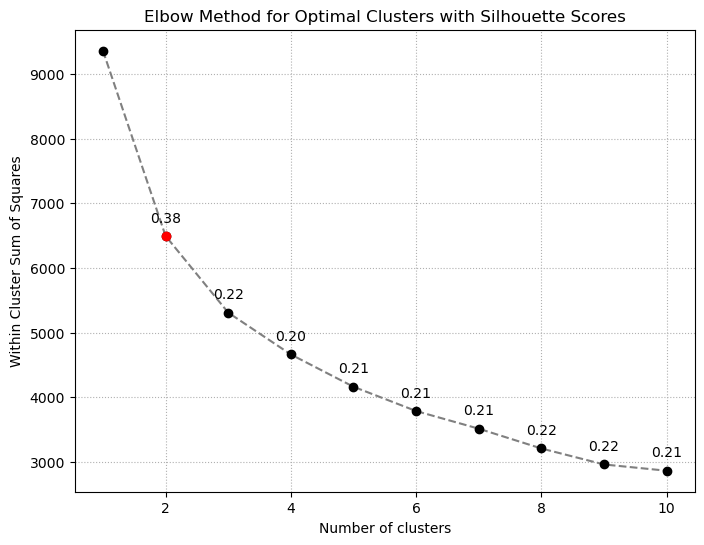

In [82]:
# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_pollutants)
    wcss.append(kmeans.inertia_)

# Calculate the silhouette scores for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_pollutants)
    silhouette_avg = silhouette_score(scaled_pollutants, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, '--', color='grey')
plt.scatter(range(1, 11), wcss, color='black', zorder=5)
plt.title('Elbow Method for Optimal Clusters with Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.grid(True, linestyle=':')

# Annotate silhouette scores on the elbow method graph
for i, txt in enumerate(silhouette_scores, start=2):
    plt.annotate(f'{txt:.2f}', (i, wcss[i-1]), textcoords="offset points", xytext=(0,10), ha='center')

# Highlight the point with the highest silhouette score
max_silhouette_score = max(silhouette_scores)
max_silhouette_index = silhouette_scores.index(max_silhouette_score) + 2
plt.scatter(max_silhouette_index, wcss[max_silhouette_index - 1], color='red', zorder=5)

# Set optimal number of clusters based on the silhouette scores
optimal_clusters = max_silhouette_index

# Show the plot and initial results
print(f'Optimal number of clusters: {optimal_clusters}')
print(f'Silhouette score: {max_silhouette_score}')
plt.show()

In [83]:
# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=808)
kmeans.fit(scaled_pollutants)

# Add cluster labels to your original dataframe
df['Cluster'] = kmeans.labels_

# Print a count of rows in each cluster
cluster_counts = df['Cluster'].value_counts().sort_index()

# Create a DataFrame for cluster counts
cluster_counts_df = cluster_counts.reset_index()
cluster_counts_df.columns = ['Cluster', 'Count']

# Show the cluster counts
print(cluster_counts_df.to_string(index=False))

 Cluster  Count
       0    262
       1   1298


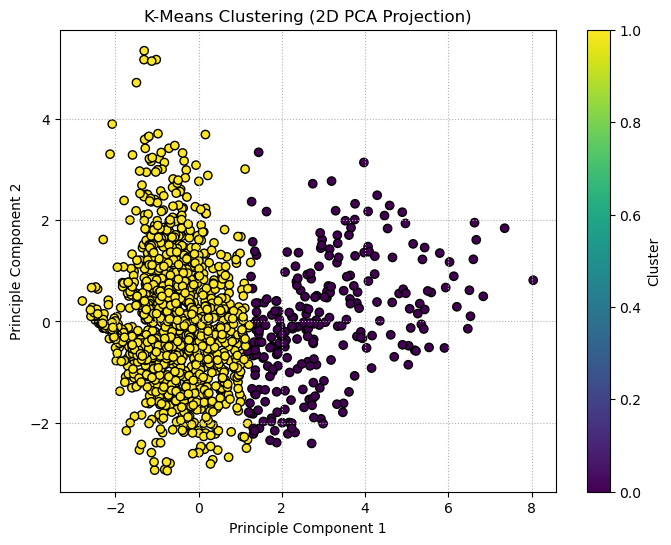

In [84]:
# Apply PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_pollutants)

# Plot the K-Means clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.title('K-Means Clustering (2D PCA Projection)')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.colorbar(label='Cluster')
plt.grid(True, linestyle=':')
plt.show()

In [85]:
# Put the principle components into a dataframe
principal_components_df = pd.DataFrame(pca.components_, columns=pollutant_columns, index=['Principle Component 1', 'Principle Component 2'])

# Add cluster centers to the dataframe
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=pollutant_columns, index=[f'Cluster {i} Centroid' for i in range(kmeans.n_clusters)])
principal_components_df = pd.concat([principal_components_df, cluster_centers], axis=0)

# Print the principal components
print("\nScaled Data:")
principal_components_df


Scaled Data:


,CO ppm,NO pphm,NO2 pphm,OZONE pphm,PM10 µg/m³,SO2 pphm
Principle Component 1,0.417745,0.563671,0.556888,-0.420029,-0.110077,0.095380
Principle Component 2,0.277206,0.070227,0.026561,0.380600,0.627273,0.615785
Cluster 0 Centroid,1.080038,1.818172,1.741707,-1.203508,-0.294475,0.249799
Cluster 1 Centroid,-0.218005,-0.366996,-0.351562,0.242927,0.059439,-0.050422
